## Import Python Module to Create/Upload New Data Instances
### (Persona: Data Engineer)

Use metaflow-based data model

In [1]:
import pandas as pd
from opal.weave.create_index import create_index_from_s3
import opal.flow
import metaflow
import os
import json
import s3fs

In [2]:
# TEST_ENV is set in the test_all script
# found in opal/devops-software.
# test_flag is set to boolean true when this notebook is being tested
test_flag = False
if "TEST_ENV" in os.environ:
    test_flag = True

## Parse and Translate NASA Chapter 10 MilStd1553 and ARINC429 Data
### (Persona: Data Engineer)

Grab a chapter 10 from Govcloud AWS

In [3]:
!python /home/jovyan/opal/data-engineering-resources/NASA_ch10_flows/upload_nasa_ch10s_flow.py run --n 1 --bucket_name etl-demo

Metaflow 2.7.23 executing NASAc10UploadFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2023-05-02 20:59:37.377 Workflow starting (run-id 1683061177296938):
2023-05-02 20:59:37.384 [1683061177296938/start/1 (pid 8165)] Task is starting.
2023-05-02 20:59:38.825 [1683061177296938/start/1 (pid 8165)] Task finished successfully.
2023-05-02 20:59:38.847 [1683061177296938/upload_ch10s/2 (pid 8210)] Task is starting.
2023-05-02 20:59:39.861 [1683061177296938/upload_ch10s/2 (pid 8210)] 1/1: opal-data/telemetry-demo-data/652200101100441.ch10
2023-05-02 20:59:41.475 [1683061177296938/upload_ch10s/2 (pid 8210)] basket successfully uploaded: etl-demo/ch10/41ade7ece92c11ed8ef80242ac12000b
2023-05-02 20:59:42.169 [1683061177296938/upload_ch10s/2 (pid 8210)] Task finished successfully.
2023-05-02 20:59:42.191 [1683061177296938/end/3 (pid 8255)] Task is starting.
2023-05-02 20:59:42.986 [1683061177296938/end/3 (pid 8255)] All Done
2023-05-02

Parse the chapter 10 using TIP

In [4]:
!python /home/jovyan/opal/data-engineering-resources/NASA_ch10_flows/parse_nasa_ch10s_flow.py run --bucket_name etl-demo

Metaflow 2.7.23 executing NASAch10ParseFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2023-05-02 20:59:53.322 Workflow starting (run-id 1683061192999314):
2023-05-02 20:59:53.329 [1683061192999314/start/1 (pid 8341)] Task is starting.
2023-05-02 20:59:54.899 [1683061192999314/start/1 (pid 8341)] Task finished successfully.
2023-05-02 20:59:54.921 [1683061192999314/parse_ch10s/2 (pid 8388)] Task is starting.
2023-05-02 20:59:55.841 [1683061192999314/parse_ch10s/2 (pid 8388)] 1/1: etl-demo/ch10/41ade7ece92c11ed8ef80242ac12000b
2023-05-02 20:59:55.930 [1683061192999314/parse_ch10s/2 (pid 8388)] GetTerminalSize(): Call to ioctl failed
2023-05-02 20:59:58.319 [1683061192999314/parse_ch10s/2 (pid 8388)] CLIGroup(): Failed to get terminal size
2023-05-02 20:59:58.320 [1683061192999314/parse_ch10s/2 (pid 8388)] basket successfully parsed and uploaded: etl-demo/ch10_parsed/4c05fa22e92c11ed8ef70242ac12000b
2023-05-02 20:59:58.988 [16

Translate the chapter 10 using TIP

### Add DTS files for translation

In [5]:
from opal.weave.access import upload
upload([{'path': r"/home/jovyan/opal/data-engineering-resources/NASA_ch10_flows/NASA_MILSTD1553_DTS.yaml",'stub': False}], 'NASA_MILSTD1553_DTS', 'etl-demo')
upload([{'path': r"/home/jovyan/opal/data-engineering-resources/NASA_ch10_flows/NASA_ARINC429_DTS.yaml",'stub': False}], 'NASA_ARINC429_DTS', 'etl-demo')

'etl-demo/NASA_ARINC429_DTS/4f46171ce92c11ed8d3d0242ac12000b'

### Translate

In [6]:
!python /home/jovyan/opal/data-engineering-resources/NASA_ch10_flows/translate_nasa_ch10s_flow.py run --bucket_name etl-demo
!python /home/jovyan/opal/data-engineering-resources/NASA_ch10_flows/translate_nasa_ch10s_flow.py run --bucket_name etl-demo --data_type ARINC429

Metaflow 2.7.23 executing NASAch10TranslateFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2023-05-02 21:00:12.353 Workflow starting (run-id 1683061212026197):
2023-05-02 21:00:12.361 [1683061212026197/start/1 (pid 8532)] Task is starting.
2023-05-02 21:00:13.978 [1683061212026197/start/1 (pid 8532)] Task finished successfully.
2023-05-02 21:00:14.001 [1683061212026197/get_dts_file/2 (pid 8585)] Task is starting.
2023-05-02 21:00:15.587 [1683061212026197/get_dts_file/2 (pid 8585)] Task finished successfully.
2023-05-02 21:00:15.609 [1683061212026197/translate_parsed/3 (pid 8638)] Task is starting.
2023-05-02 21:00:16.506 [1683061212026197/translate_parsed/3 (pid 8638)] -- translating 1 of 1: etl-demo/ch10_parsed/4c05fa22e92c11ed8ef70242ac12000b
2023-05-02 21:00:16.568 [1683061212026197/translate_parsed/3 (pid 8638)] GetTerminalSize(): Call to ioctl failed
2023-05-02 21:00:17.473 [1683061212026197/translate_parsed/3 (pid 8638

## Create a searchable index of the datastore

In [7]:
index = create_index_from_s3('etl-demo')

In [8]:
index

,uuid,upload_time,parent_uuids,basket_type,label,address,storage_type
0,4f46171ce92c11ed8d3d0242ac12000b,05/02/2023 21:00:03,[],NASA_ARINC429_DTS,,etl-demo/NASA_ARINC429_DTS/4f46171ce92c11ed8d3...,s3
1,4f3112a4e92c11ed8d3d0242ac12000b,05/02/2023 21:00:03,[],NASA_MILSTD1553_DTS,,etl-demo/NASA_MILSTD1553_DTS/4f3112a4e92c11ed8...,s3
2,41ade7ece92c11ed8ef80242ac12000b,05/02/2023 20:59:41,[],ch10,652200101100441,etl-demo/ch10/41ade7ece92c11ed8ef80242ac12000b,s3
3,4c05fa22e92c11ed8ef70242ac12000b,05/02/2023 20:59:58,[41ade7ece92c11ed8ef80242ac12000b],ch10_parsed,652200101100441,etl-demo/ch10_parsed/4c05fa22e92c11ed8ef70242a...,s3
4,63e2032ae92c11edac860242ac12000b,05/02/2023 21:00:38,"[4c05fa22e92c11ed8ef70242ac12000b, 4f46171ce92...",ch10_translated_ARINC429,652200101100441,etl-demo/ch10_translated_ARINC429/63e2032ae92c...,s3
5,577d682ce92c11ed8f230242ac12000b,05/02/2023 21:00:17,"[4c05fa22e92c11ed8ef70242ac12000b, 4f3112a4e92...",ch10_translated_MILSTD1553,652200101100441,etl-demo/ch10_translated_MILSTD1553/577d682ce9...,s3


Show metadata that will be queryable soon.

In [9]:
s3 = s3fs.S3FileSystem(client_kwargs = {'endpoint_url': os.environ['S3_ENDPOINT']})
arinc_path = index[index.basket_type == 'ch10_translated_ARINC429'].address.iloc[0]
arinc_metadata_path = os.path.join(arinc_path, 'basket_metadata.json')
with s3.open(arinc_metadata_path, 'rb') as file:
    arinc_metadata = json.load(file)
arinc_metadata

{'translate_metadata': {'type': 'translated_ARINC429_F0',
  'uid': 'f893220d61aa2971512effe7720e117f7b4a94689410f9684ed1de981f8eaef8',
  'provenance': {'time': '2023-05-02 21:00:35',
   'version': 'v2.0.0',
   'resource': [{'type': 'DTS_ARINC429_F0',
     'path': '/tmp/tmpfv9z3oc5/local_dts_folder/NASA_ARINC429_DTS.yaml',
     'uid': '21f6e2e255ebd61662e9311b47cf6b915bd28d5d7e36d4f1f15e67182b2cd884'},
    {'type': 'parsed_ARINC429_F0',
     'path': '/tmp/tmpfv9z3oc5/parsed_data.parquet',
     'uid': '2a52ae3b5a014beba2038bc3707573a3387020fdd77cd5f37947d668fb38239e'},
    {'type': 'CH10',
     'path': '/tmp/tmpvhvn22_s/652200101100441.ch10',
     'uid': '39d9f96996cc5654bfa6d7b000bedafdedaa27d7240d9d922ca01ac5033e119c'}]},
  'config': {'translate_thread_count': 3,
   'use_tmats_busmap': False,
   'tmats_busname_corrections': {},
   'prompt_user': False,
   'vote_threshold': 1,
   'vote_method_checks_tmats': False,
   'bus_name_exclusions': [],
   'stop_after_bus_map': False,
   'select_

# Analyze Data in New Dataset

Latitude/Longitude/Altitude (1553)

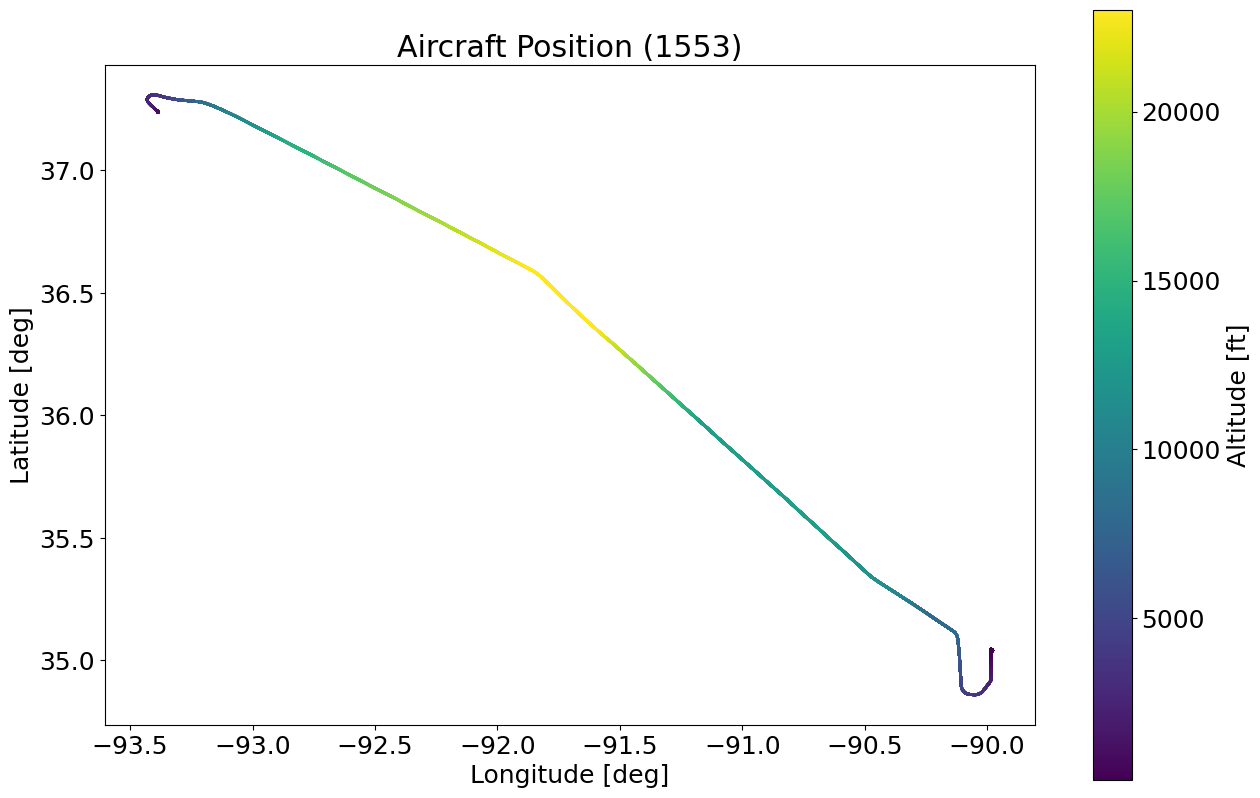

In [10]:
import matplotlib.pyplot as plt
import os

# Construct the path to the parquet file in S3
s3 = opal.flow.minio_s3fs()
parquet_path = index[index.basket_type == 'ch10_translated_MILSTD1553'].address.iloc[0]
parquet_path = os.path.join(parquet_path, "parsed_data_translated", "NAV.parquet", "00.parquet")

# Read it with Pandas
df_1553 = pd.read_parquet(parquet_path, filesystem=s3)

# Filter out invalid lat/long/altitude measurements
where_valid = df_1553[df_1553["NAV-0110"] & df_1553["NAV-0111"]]
plt.rcParams.update({"font.size":18})

# plot
fig, ax = plt.subplots()
ax = where_valid.plot(
    kind="scatter", title="Aircraft Position (1553)",
    x="NAV-23", y="NAV-21", c="NAV-25", s=1,
    cmap="viridis", figsize=(15, 10), ax=ax)

ax.set_aspect("equal")
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")
plt.gcf().get_axes()[1].set_ylabel("Altitude [ft]")
plt.show()

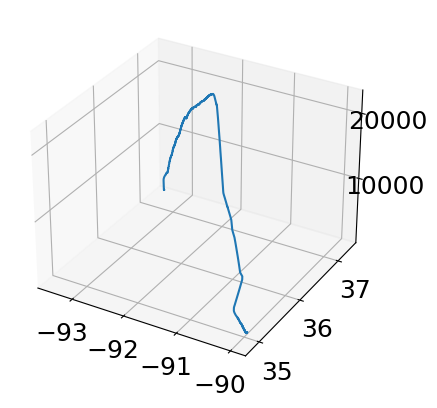

In [11]:
ax = plt.axes(projection='3d')
xline = where_valid['NAV-23']
yline = where_valid['NAV-21']
zline = where_valid['NAV-25']
ax.plot3D(xline, yline, zline)
plt.show()

#### Engine Status (ARINC429) with Altitude (1553)

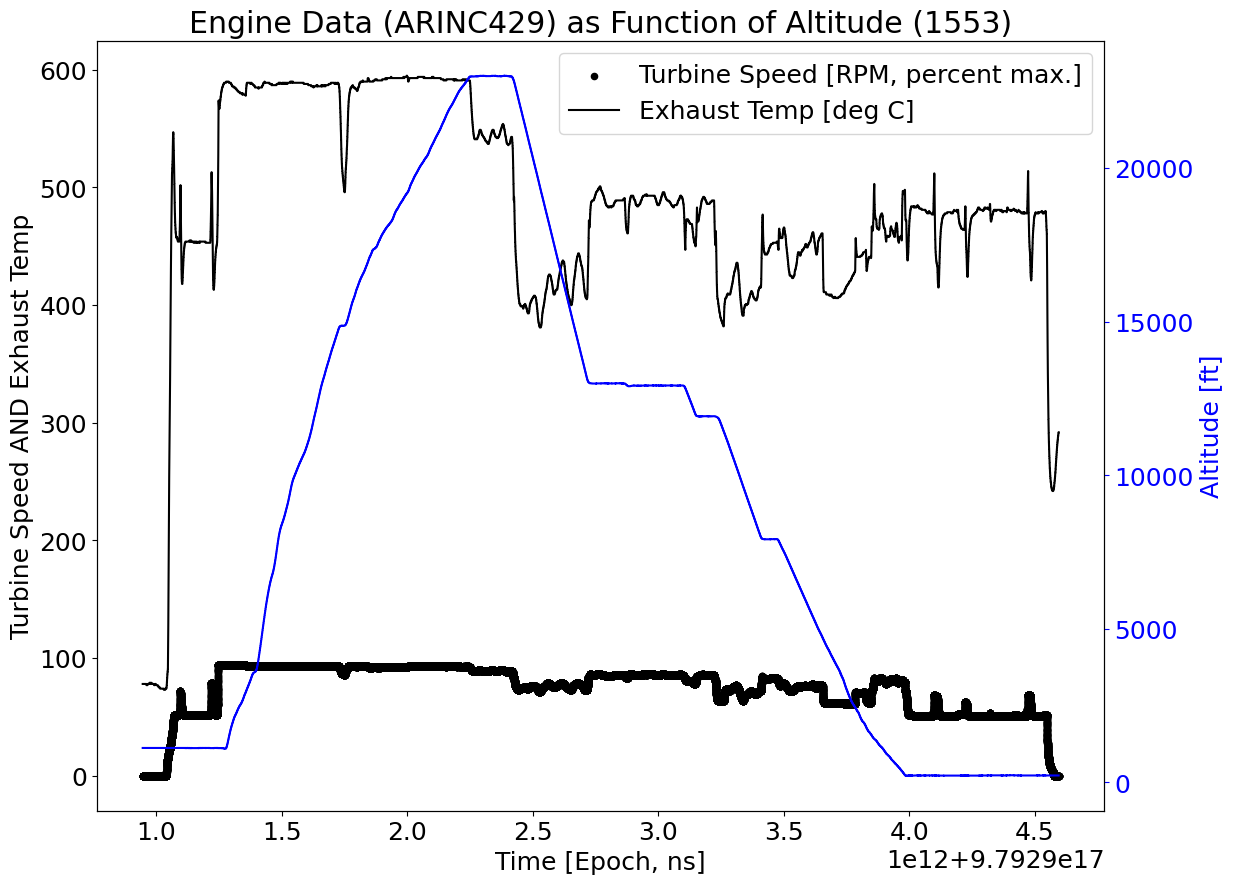

In [12]:
arinc429_path = index[index.basket_type == 'ch10_translated_ARINC429'].address.iloc[0]
arinc429_path = os.path.join(arinc429_path, "parsed_data_translated")

turbine_speed_path = os.path.join(arinc429_path, "Engine_Turbine_RPM_40.parquet", '00.parquet')
exhaust_temp_path = os.path.join(arinc429_path, "Exhaust_Gas_Temperature_40.parquet", '00.parquet')

df_turbine_speed = pd.read_parquet(turbine_speed_path, filesystem=s3)
df_exhaust_temp = pd.read_parquet(exhaust_temp_path, filesystem=s3)

ax = df_turbine_speed.plot(kind="scatter", x="time", y="N2_RPM", figsize=(13, 10), c='k', label="Turbine Speed [RPM, percent max.]")
ax.set_ylabel(r'Turbine Speed AND Exhaust Temp', c='k')
ax.tick_params(axis='y', colors='k')
df_exhaust_temp.plot(kind="line", x="time", y="Exhaust_Gas_Temperature", ax=ax, c='k', label="Exhaust Temp [deg C]")
ax2 = where_valid.plot(kind="line", x="time", y="NAV-25", secondary_y=True, c='b', ax=ax)
ax2.set_ylabel("Altitude [ft]", c='b')
ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')
ax.set_xlabel("Time [Epoch, ns]")
ax.legend()
title = ax.set_title("Engine Data (ARINC429) as Function of Altitude (1553)")
plt.show()

# Delete data for next run

In [13]:
parse_flow = metaflow.Flow("NASAch10ParseFlow")
translate_flow = metaflow.Flow("NASAch10TranslateFlow")
upload_flow = metaflow.Flow("NASAc10UploadFlow")

#get arinc run id from previously grabbed metadata
arinc429_id = arinc_metadata['metaflow_manifest']['run_id']

#grab 1553 run metadata to get the run id
milstd1553_path = index[index.basket_type == 'ch10_translated_MILSTD1553'].address.iloc[0]
milstd1553_metadata_path = os.path.join(milstd1553_path, 'basket_metadata.json')
with s3.open(milstd1553_metadata_path, 'rb') as file:
    milstd1553_metadata = json.load(file)
mil1553_id = milstd1553_metadata['metaflow_manifest']['run_id']

#grab parse run metadata to get the run id
parsed_path = index[index.basket_type == 'ch10_parsed'].address.iloc[0]
parsed_metadata_path = os.path.join(parsed_path, 'basket_metadata.json')
with s3.open(parsed_metadata_path, 'rb') as file:
    parsed_metadata = json.load(file)
parse_id = parsed_metadata['metaflow_manifest']['run_id']

#grab upload run metadata to get the run id
ch10_path = index[index.basket_type == 'ch10'].address.iloc[0]
ch10_metadata_path = os.path.join(ch10_path, 'basket_metadata.json')
with s3.open(ch10_metadata_path, 'rb') as file:
    ch10_metadata = json.load(file)
upload_id = ch10_metadata['metaflow_manifest']['run_id']

opal.flow.delete_run_data(parse_flow[parse_id])
opal.flow.delete_run_data(translate_flow[arinc429_id])
opal.flow.delete_run_data(translate_flow[mil1553_id])
opal.flow.delete_run_data(upload_flow[upload_id])

In [15]:
s3.rm('s3://etl-demo', recursive = True)